<h1 style = 'text-align: center;'> ALCOHOL CONSUMPTION IMPACT ON PORTUGUESE HIGH SCHOOL STUDENTS' ACADEMIC PERFORMANCE </h1>

<img src='./UCSD final project materials/Students lifestyle image.jpg'>


## Brief introduction:
Education is a key factor for achieving a long-term economic progress. During the last decades, the Portuguese educational level has improved. However, the statistics keep the Portugal at Europe’s tail end due to its high student failure and dropping out rates.
This data approaches student achievement in secondary education of two Portuguese schools.

## Data acquisition:
The data was collected during the 2005-2006 school year from two public schools (Gabriel Pereira and Mousinho da Silveira) located in the Alentejo region of Portugal. Despite the fact that there has been a trend for an increase of investment in the information systems field from the portuguese Government, the majority of the Portuguese public schools' information systems are very poor as they are relying mostly on paper sheets (which is the case with our datasets). Hence, these two datasets were built from two sources, which are: 
 1. school reports based on paper sheets and including few attributes
 
 2. questionnaires used to complement the previous information
 

## Data attributes:
 * sex: student’s sex (binary: female or male) 
 * age: student’s age (numeric: from 15 to 22)
 * school: student’s school (binary: Gabriel Pereira or Mousinho da Silveira)
 * address: student’s home address type (binary: urban or rural) 
 * Pstatus: parent’s cohabitation status (binary: living together or apart)
 * Medu: mother’s education (numeric: from 0 to 4^a)
 * Mjob: mother’s job (nominalb)
 * Fedu: father’s education (numeric: from 0 to 4^a)
 * Fjob: father’s job (nominalb)
 * guardian: student’s guardian (nominal: mother, father or other)
 * famsize: family size (binary: ≤ 3 or > 3)
 * famrel: famrel quality of family relationships (numeric: from 1 – very bad to 5 – excellent)
 * reason: reason to choose this school (nominal: close to home, school reputation, course preference or other)
 * traveltime: home to school travel time (numeric: 1 – < 15 min., 2 – 15 to 30 min., 3 – 30 min. to 1 hour or 4 – > 1 hour)
 * studytime: weekly study time (numeric: 1 – < 2 hours, 2 – 2 to 5 hours, 3 – 5 to 10 hours or 4 – > 10 hours)
 * failures: number of past class failures (numeric: n if 1 ≤ n < 3, else 4)
 * schoolsup: extra educational school support (binary: yes or no)
 * famsup: family educational support (binary: yes or no)
 * activities: extra-curricular activities (binary: yes or no)
 * paidclass: extra paid classes (binary: yes or no)
 * internet: internet access at home (binary: yes or no)
 * nursery: attended nursery school (binary: yes or no)
 * higher: wants to take higher education (binary: yes or no)
 * romantic: with a romantic relationship (binary: yes or no)
 * freetime: free time after school (numeric: from 1 – very low to 5 – very high)
 * goout: going out with friends (numeric: from 1 – very low to 5 – very high)
 * Walc: weekend alcohol consumption (numeric: from 1 – very low to 5 – very high)
 * Walc: Dalc workday alcohol consumption (numeric: from 1 – very low to 5 – very high)
 * health: health current health status (numeric: from 1 – very bad to 5 – very good)
 * absences: number of school absences (numeric: from 0 to 93)
 * G1: first period grade (numeric: from 0 to 20)
 * G2: second period grade (numeric: from 0 to 20)
 * G3: final grade (numeric: from 0 to 20)

such that:
* a: 0 – none, 1 – primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education
* b: teacher, health care related, civil services (e.g. administrative or police), at home or other.

### Datasets references:
* Cortez, P., & Silva, A. M. G. (2008). Using Data Mining to Predict Secondary School Student Performance. In A. Brito, & J. Teixeira (Eds.), Proceedings of 5th Annual Future Business Technology Conference, Porto, 5-12 : http://www3.dsi.uminho.pt/pcortez/student.pdf
* UCI website: https://archive.ics.uci.edu/ml/datasets/student+performance

In [616]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#importing libraries for linear regression ML model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

#importing libraries for classification ML model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder

## Math dataset:

In [617]:
#reading math dataset
alcohol_math = pd.read_csv('./UCSD final project materials/math dataset.csv')

In [618]:
#exploring the math dataset
alcohol_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [619]:
#identifying the columns that fall under int64 data-type
alcohol_math_numeric = alcohol_math.select_dtypes(include=int)
print(alcohol_math_numeric.columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


In [620]:
#identifying the columns that fall under object data-type
alcohol_math_str = alcohol_math.columns[alcohol_math.dtypes=='object']
print(alcohol_math_str)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [621]:
#exploring the head of the math dataset
alcohol_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [622]:
#exploring the tail of the math dataset
alcohol_math.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [623]:
#descriptive statistical information for int64 data-types
alcohol_math.describe(include = [int])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [624]:
#descriptive statistical information for object data-types
alcohol_math.describe(include = [object])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


<AxesSubplot:>

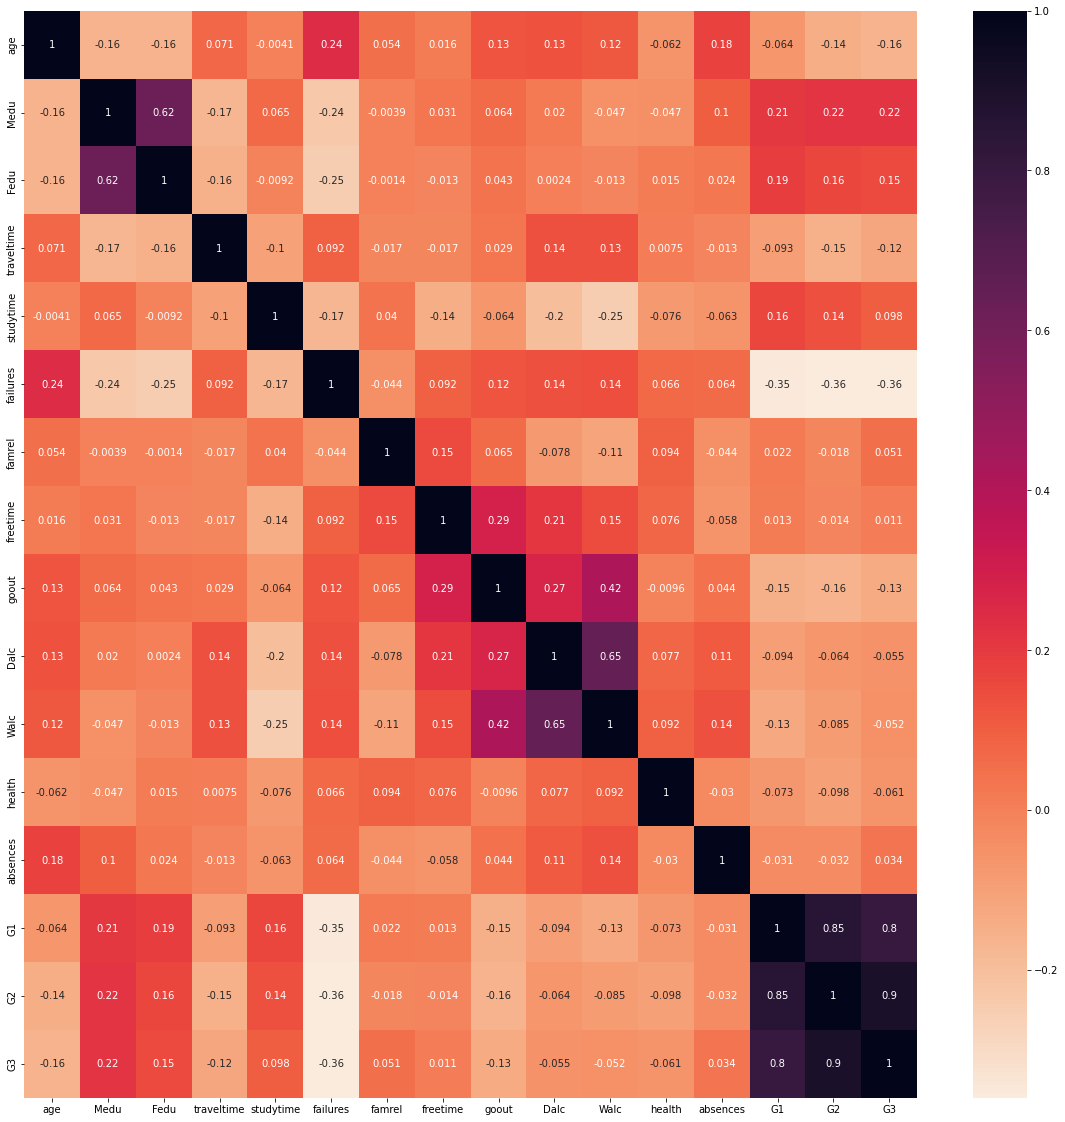

In [625]:
#creating a heatmap to indentify the nature of the relationships between the different attributes of the math dataset
plt.figure(figsize=(20,20))
sns.heatmap(alcohol_math.corr(),annot=True,cmap='rocket_r') 

In [626]:
#creating an independent copy of the math dataset to preserve the original math dataset from any modifications throughout the analysis
alcohol_math_copy = alcohol_math.copy(deep = True)

In [627]:
#Classifying students as 'passed' or 'failed' based on their final grade 'G3' in math dataset
math_final_grade_status = ['passed' if value>=10 else 'failed' for value in alcohol_math_copy['G3']]
alcohol_math_copy.insert(33, "passed_or_failed", math_final_grade_status , True) 

In [628]:
alcohol_math_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   school            395 non-null    object
 1   sex               395 non-null    object
 2   age               395 non-null    int64 
 3   address           395 non-null    object
 4   famsize           395 non-null    object
 5   Pstatus           395 non-null    object
 6   Medu              395 non-null    int64 
 7   Fedu              395 non-null    int64 
 8   Mjob              395 non-null    object
 9   Fjob              395 non-null    object
 10  reason            395 non-null    object
 11  guardian          395 non-null    object
 12  traveltime        395 non-null    int64 
 13  studytime         395 non-null    int64 
 14  failures          395 non-null    int64 
 15  schoolsup         395 non-null    object
 16  famsup            395 non-null    object
 17  paid            

In [629]:
alcohol_math_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,failed
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,failed
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,passed
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,passed
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,failed
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,passed
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,failed
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,passed


## Portuguese dataset:

In [630]:
#reading Portuguese dataset
alcohol_port = pd.read_csv('./UCSD final project materials/portuguese dataset.csv')

In [631]:
#exploring the Portuguese dataset
alcohol_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [632]:
#identifying the columns that fall under int64 data-type
alcohol_port_numeric = alcohol_port.select_dtypes(include=int)
print(alcohol_port_numeric.columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


In [633]:
#identifying the columns that fall under object data-type
alcohol_port_str = alcohol_port.columns[alcohol_port.dtypes=='object']
print(alcohol_port_str)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [634]:
#exploring the head of the Portuguese dataset
alcohol_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [635]:
#exploring the tail of the Portuguese dataset
alcohol_math.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [636]:
#descriptive statistical information for int64 data-types
alcohol_port.describe(include = [int])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [637]:
#descriptive statistical information for object data-types
alcohol_port.describe(include = [object])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


<AxesSubplot:>

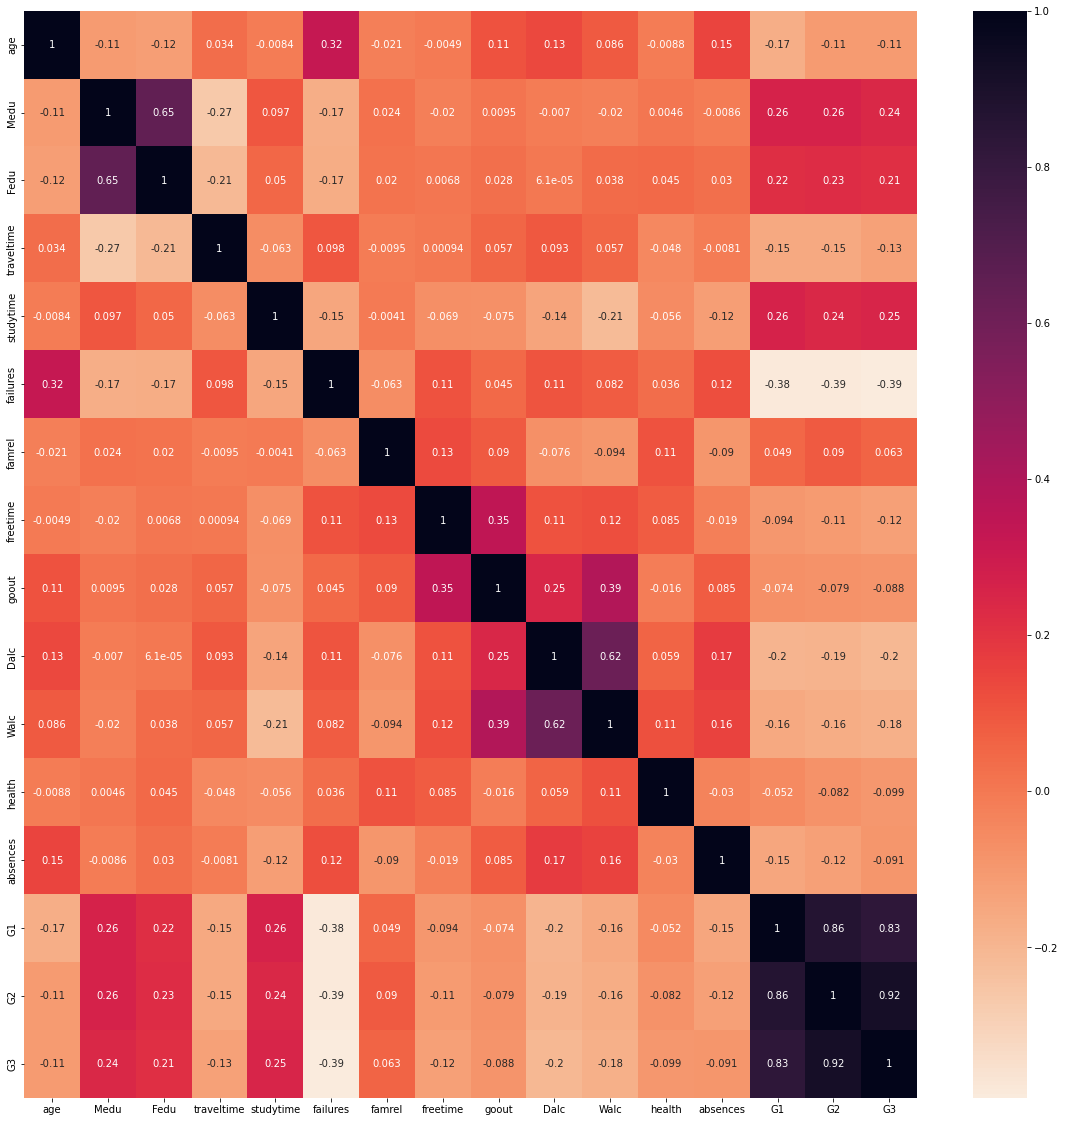

In [638]:
#creating a heatmap to indentify the nature of the relationships between the different attributes of the Portuguese dataset
plt.figure(figsize=(20,20))
sns.heatmap(alcohol_port.corr(),annot=True,cmap='rocket_r') 

In [639]:
#creating an independent copy of the Portuguese dataset to preserve the original Portuguese dataset from any modifications throughout the analysis
alcohol_port_copy = alcohol_port.copy(deep = True)

In [640]:
#Classifying students as 'passed' or 'failed' based on their final grade 'G3' in Portuguese dataset
port_final_grade_status = ['passed' if value>=10 else 'failed' for value in alcohol_port_copy['G3']]
alcohol_port_copy.insert(33, "passed_or_failed", port_final_grade_status , True) 

In [641]:
alcohol_port_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   school            649 non-null    object
 1   sex               649 non-null    object
 2   age               649 non-null    int64 
 3   address           649 non-null    object
 4   famsize           649 non-null    object
 5   Pstatus           649 non-null    object
 6   Medu              649 non-null    int64 
 7   Fedu              649 non-null    int64 
 8   Mjob              649 non-null    object
 9   Fjob              649 non-null    object
 10  reason            649 non-null    object
 11  guardian          649 non-null    object
 12  traveltime        649 non-null    int64 
 13  studytime         649 non-null    int64 
 14  failures          649 non-null    int64 
 15  schoolsup         649 non-null    object
 16  famsup            649 non-null    object
 17  paid            

In [642]:
alcohol_port_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,passed
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,passed
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,passed
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,passed
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,passed
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,passed
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,failed
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,passed


## Portuguese high school students' alcohol consumption impact on their academic performance across two different courses (Mathematics course and Portuguese language course) that fall under different education categories:

Lingustics, the systematic study of human language, lies at the crossroads of humanities and the social sciences; On the other hand, mathematics is a STEM major.

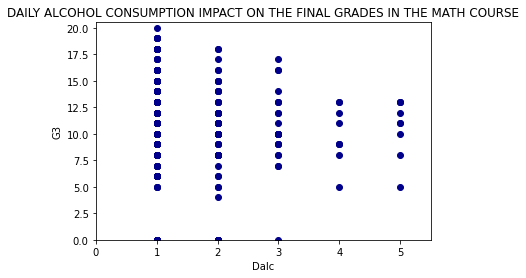

In [643]:
#creating scatter plot diagram between daily alcohol consumption'Dalc' and final grade 'G3' for the math dataset
plt.scatter(alcohol_math_copy['Dalc'], alcohol_math_copy['G3'], c='Darkblue')
plt.title('DAILY ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN THE MATH COURSE')
plt.xlim(0.0 , 5.5) 
plt.ylim(0.0 ,20.5)
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.show()

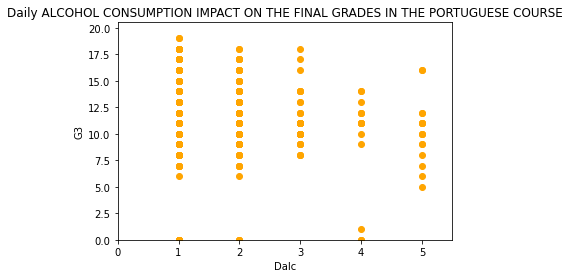

In [644]:
#creating scatter plot diagram between daily alcohol consumption'Dalc' and final grade 'G3' for the Portuguese dataset
plt.scatter(alcohol_port_copy['Dalc'], alcohol_port_copy['G3'], c='orange')
plt.title('Daily ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN THE PORTUGUESE COURSE')
plt.xlim(0.0 , 5.5) 
plt.ylim(0.0 ,20.5)
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.show()

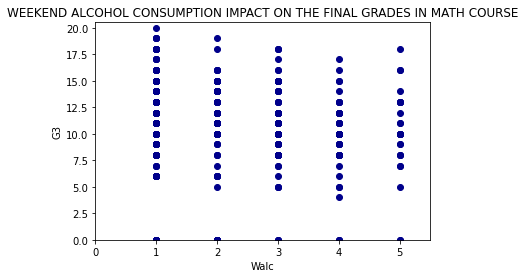

In [645]:
#creating scatter plot diagram between weekend alcohol consumption'Walc' and final grade 'G3' for th math dataset
plt.scatter(alcohol_math_copy['Walc'], alcohol_math_copy['G3'], c='Darkblue')
plt.title('WEEKEND ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN MATH COURSE')
plt.xlim(0.0 , 5.5) 
plt.ylim(0.0 ,20.5)
plt.xlabel('Walc')
plt.ylabel('G3')
plt.show()

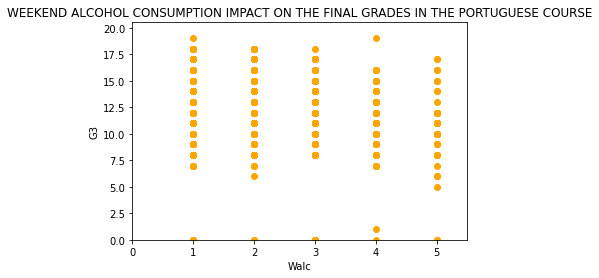

In [646]:
#creating scatter plot diagram between weekend alcohol consumption'Walc' and final grade 'G3' for the Portuguese dataset
plt.scatter(alcohol_port_copy['Walc'], alcohol_port_copy['G3'], c='orange')
plt.title('WEEKEND ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN THE PORTUGUESE COURSE')
plt.xlim(0.0 , 5.5) 
plt.ylim(0.0 ,20.5)
plt.xlabel('Walc')
plt.ylabel('G3')
plt.show()

## Portuguese high school students' alcohol consumption impact on their final status (passed or failed):

### 1. Math dataset:

In [647]:
#creating a histogram between final grade status 'passed_or_failed' and both weekend 'Walc' / daily alcohol 'Dalc' consumption for the math dataset
alcohol_math_final_grade_satus = alcohol_math_copy.columns[26:28]
for alcohol_final_grade_satus in alcohol_math_final_grade_satus:
    fig = px.histogram(alcohol_math_copy, x=alcohol_final_grade_satus ,color="passed_or_failed")
    fig.show()

### 2. Portuguese dataset:

In [648]:
#creating a histogram between final grade status 'passed_or_failed' and both weekend 'Walc' / daily alcohol 'Dalc' consumption for the Portuguese dataset
alcohol_port_final_grade_satus = alcohol_port_copy.columns[26:28]
for alcohol_final_grade_satus in alcohol_port_final_grade_satus:
    fig = px.histogram(alcohol_port_copy, x=alcohol_final_grade_satus ,color="passed_or_failed")
    fig.show()

## Portuguese high school students' alcohol consumption impact on their academic performance in two different educational institutions (Gabriel Pereira high school and Mousinho da Silveira high school):

### 1. Math dataset:

In [649]:
#creating seperate dataset from math datatset for students who attend Gabriel Pereira high school
alcohol_math_gp = alcohol_math_copy[alcohol_math_copy['school'] == 'GP']

#creating new column with for studentID in alcohol_math_gp
first_studentID_list= list(range(1, 350, 1))
first_studentID_list_df= pd.DataFrame(first_studentID_list)
alcohol_math_gp.insert(0, "studentID", first_studentID_list_df, True)

alcohol_math_gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   studentID         349 non-null    int64 
 1   school            349 non-null    object
 2   sex               349 non-null    object
 3   age               349 non-null    int64 
 4   address           349 non-null    object
 5   famsize           349 non-null    object
 6   Pstatus           349 non-null    object
 7   Medu              349 non-null    int64 
 8   Fedu              349 non-null    int64 
 9   Mjob              349 non-null    object
 10  Fjob              349 non-null    object
 11  reason            349 non-null    object
 12  guardian          349 non-null    object
 13  traveltime        349 non-null    int64 
 14  studytime         349 non-null    int64 
 15  failures          349 non-null    int64 
 16  schoolsup         349 non-null    object
 17  famsup          

In [650]:
alcohol_math_gp

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,failed
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,failed
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,passed
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,passed
4,5,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,345,GP,F,18,U,GT3,T,2,3,at_home,...,3,3,1,2,3,4,11,10,10,passed
345,346,GP,F,18,U,GT3,T,3,2,other,...,4,3,2,3,1,7,13,13,14,passed
346,347,GP,M,18,R,GT3,T,4,3,teacher,...,3,2,1,2,4,9,16,15,16,passed
347,348,GP,M,18,U,GT3,T,4,3,teacher,...,4,5,2,3,5,0,10,10,9,failed


In [651]:
alcohol_math_gp.shape

(349, 35)

In [652]:
#creating seperate dataset from math datatset for students who attend Mousinho da Silveira high school
alcohol_math_ms = alcohol_math_copy[alcohol_math_copy['school'] == 'MS']

#creating new column with for studentID in alcohol_math_ms
second_studentID_list= list(range(1, 47, 1))
second_studentID_list_df= pd.DataFrame(second_studentID_list)
alcohol_math_ms.insert(0, "studentID", second_studentID_list_df, True)

alcohol_math_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 349 to 394
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   studentID         46 non-null     int64 
 1   school            46 non-null     object
 2   sex               46 non-null     object
 3   age               46 non-null     int64 
 4   address           46 non-null     object
 5   famsize           46 non-null     object
 6   Pstatus           46 non-null     object
 7   Medu              46 non-null     int64 
 8   Fedu              46 non-null     int64 
 9   Mjob              46 non-null     object
 10  Fjob              46 non-null     object
 11  reason            46 non-null     object
 12  guardian          46 non-null     object
 13  traveltime        46 non-null     int64 
 14  studytime         46 non-null     int64 
 15  failures          46 non-null     int64 
 16  schoolsup         46 non-null     object
 17  famsup         

In [653]:
alcohol_math_ms

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
349,1,MS,M,18,R,GT3,T,3,2,other,...,5,5,5,5,5,10,11,13,13,passed
350,2,MS,M,19,R,GT3,T,1,1,other,...,4,4,3,3,2,8,8,7,8,failed
351,3,MS,M,17,U,GT3,T,3,3,health,...,5,4,2,3,3,2,13,13,13,passed
352,4,MS,M,18,U,LE3,T,1,3,at_home,...,3,3,2,3,3,7,8,7,8,failed
353,5,MS,M,19,R,GT3,T,1,1,other,...,4,4,3,3,5,4,8,8,8,failed
354,6,MS,M,17,R,GT3,T,4,3,services,...,5,5,1,3,2,4,13,11,11,passed
355,7,MS,F,18,U,GT3,T,3,3,services,...,3,4,1,1,5,0,10,9,9,failed
356,8,MS,F,17,R,GT3,T,4,4,teacher,...,3,3,1,2,5,4,12,13,13,passed
357,9,MS,F,17,U,LE3,A,3,2,services,...,2,3,1,2,5,2,12,12,11,passed
358,10,MS,M,18,U,LE3,T,1,1,other,...,3,2,1,2,3,4,10,10,10,passed


In [654]:
alcohol_math_ms.shape

(46, 35)

In [655]:
#creating seperate dataset of random (n = 46, where n: noumber of students) Gabriel Pereira high school students 
alcohol_math_gp_rand = alcohol_math_gp.sample(n = 46)
del alcohol_math_gp_rand['studentID']
fifth_studentID_list= list(range(1, 47, 1))
fifth_studentID_list_df= pd.DataFrame(fifth_studentID_list)
alcohol_math_gp_rand.insert(0, "studentID", fifth_studentID_list_df, True)

In [656]:
alcohol_math_gp_rand

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
263,1,GP,F,17,U,GT3,T,3,3,other,...,2,3,1,1,4,4,10,9,9,failed
206,2,GP,F,16,U,GT3,A,3,1,services,...,3,3,2,2,4,5,7,7,7,failed
108,3,GP,M,15,R,GT3,T,4,4,other,...,3,5,3,5,1,6,10,13,13,passed
111,4,GP,F,16,R,GT3,T,3,3,services,...,1,2,1,1,2,0,7,10,10,passed
287,5,GP,F,17,U,GT3,T,1,1,services,...,3,3,1,1,3,6,13,12,12,passed
46,6,GP,F,16,U,LE3,A,3,3,other,...,3,5,1,4,3,12,11,12,11,passed
311,7,GP,F,19,U,GT3,T,2,1,at_home,...,4,1,1,1,2,20,14,12,13,passed
52,8,GP,M,15,U,LE3,A,4,2,health,...,5,5,3,4,5,6,11,11,10,passed
314,9,GP,F,19,U,GT3,T,1,1,at_home,...,1,2,1,1,3,14,15,13,13,passed
196,10,GP,M,17,U,GT3,T,4,4,services,...,2,3,1,2,5,4,17,15,16,passed


In [657]:
alcohol_math_gp_rand.shape

(46, 35)

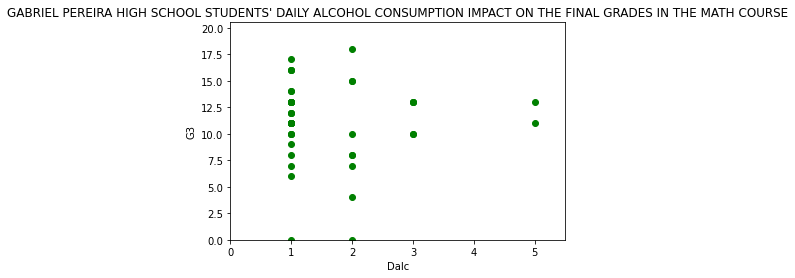

In [658]:
#creating scatter plot diagram for Gabriel Pereira high school students' daily alcohol consumption 'Dalc' in the math dataset
plt.scatter(alcohol_math_gp_rand['Dalc'], alcohol_math_gp_rand['G3'], c='green')
plt.title("GABRIEL PEREIRA HIGH SCHOOL STUDENTS' DAILY ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN THE MATH COURSE")
plt.xlim(0.0 , 5.5)
plt.ylim(0.0 ,20.5)
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.show()

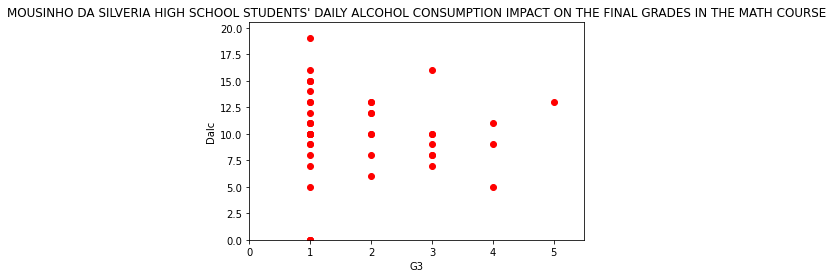

In [659]:
#creating scatter plot diagram for Mousinho da Silveira high school students' daily alcohol consumption 'Dalc' in the math dataset
plt.scatter(alcohol_math_ms['Dalc'], alcohol_math_ms['G3'], c='red')
plt.title("MOUSINHO DA SILVERIA HIGH SCHOOL STUDENTS' DAILY ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN THE MATH COURSE")
plt.xlim(0.0 , 5.5)
plt.ylim(0.0 ,20.5)
plt.xlabel('G3')
plt.ylabel('Dalc')
plt.show()

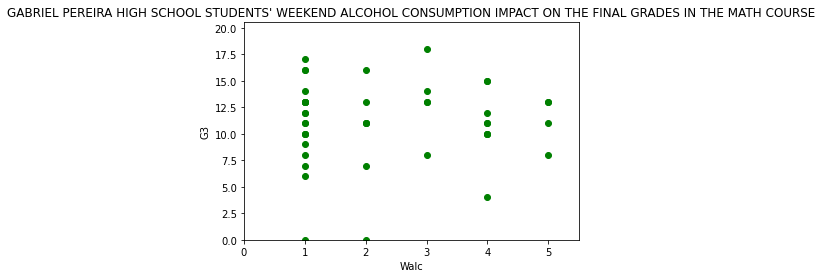

In [660]:
#creating scatter plot diagram for Gabriel Pereira high school students' weekend alcohol consumption 'Walc' in the math dataset
plt.scatter(alcohol_math_gp_rand['Walc'], alcohol_math_gp_rand['G3'], c='green')
plt.title("GABRIEL PEREIRA HIGH SCHOOL STUDENTS' WEEKEND ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN THE MATH COURSE")
plt.xlim(0.0 , 5.5)
plt.ylim(0.0 ,20.5)
plt.xlabel('Walc')
plt.ylabel('G3')
plt.show()

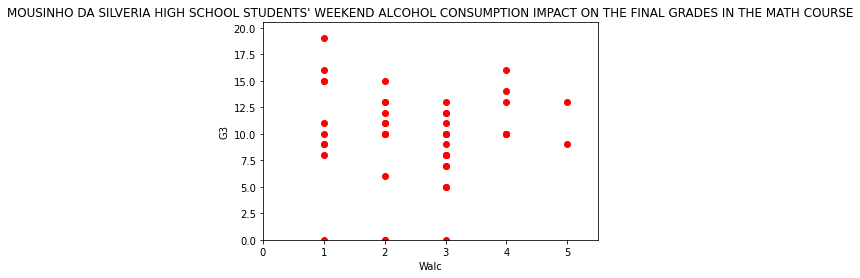

In [661]:
#creating scatter plot diagram for Mousinho da Silveira high school students' weekend alcohol consumption 'Walc' in the math dataset
plt.scatter(alcohol_math_ms['Walc'], alcohol_math_ms['G3'], c='red')
plt.title("MOUSINHO DA SILVERIA HIGH SCHOOL STUDENTS' WEEKEND ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN THE MATH COURSE")
plt.xlim(0.0 , 5.5)
plt.ylim(0.0 ,20.5)
plt.xlabel('Walc')
plt.ylabel('G3')
plt.show()

### 2. Portuguese dataset:

In [662]:
#creating seperate dataset from Portuguese datatset for students who attend Gabriel Pereira high school
alcohol_port_gp = alcohol_port_copy[alcohol_port_copy['school'] == 'GP']

#creating new column with for studentID in alcohol_port_gp
third_studentID_list= list(range(1, 424, 1))
third_studentID_list_df= pd.DataFrame(third_studentID_list)
alcohol_port_gp.insert(0, "studentID", third_studentID_list_df, True)

alcohol_port_gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   studentID         423 non-null    int64 
 1   school            423 non-null    object
 2   sex               423 non-null    object
 3   age               423 non-null    int64 
 4   address           423 non-null    object
 5   famsize           423 non-null    object
 6   Pstatus           423 non-null    object
 7   Medu              423 non-null    int64 
 8   Fedu              423 non-null    int64 
 9   Mjob              423 non-null    object
 10  Fjob              423 non-null    object
 11  reason            423 non-null    object
 12  guardian          423 non-null    object
 13  traveltime        423 non-null    int64 
 14  studytime         423 non-null    int64 
 15  failures          423 non-null    int64 
 16  schoolsup         423 non-null    object
 17  famsup          

In [663]:
alcohol_port_gp

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,4,0,11,11,passed
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,2,9,11,11,passed
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,6,12,13,12,passed
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,0,14,14,14,passed
4,5,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,0,11,13,13,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,419,GP,M,18,R,GT3,T,2,3,other,...,1,3,4,5,4,13,13,14,14,passed
419,420,GP,M,19,U,GT3,T,2,1,other,...,3,4,1,4,4,10,7,11,11,passed
420,421,GP,F,18,U,LE3,A,2,2,services,...,1,4,1,3,4,10,14,17,17,passed
421,422,GP,F,20,U,GT3,T,1,0,other,...,3,1,1,1,5,5,8,10,10,passed


In [664]:
alcohol_port_gp.shape

(423, 35)

In [665]:
#creating seperate dataset from Portuguese datatset for students who attend Mousinho da Silveira high school
alcohol_port_ms = alcohol_port_copy[alcohol_port_copy['school'] == 'MS']

#creating new column with for studentID in alcohol_port_gp
fourth_studentID_list= list(range(1, 227, 1))
fourth_studentID_list_df= pd.DataFrame(fourth_studentID_list)
alcohol_port_ms.insert(0, "studentID", fourth_studentID_list_df, True)

alcohol_port_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 423 to 648
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   studentID         226 non-null    int64 
 1   school            226 non-null    object
 2   sex               226 non-null    object
 3   age               226 non-null    int64 
 4   address           226 non-null    object
 5   famsize           226 non-null    object
 6   Pstatus           226 non-null    object
 7   Medu              226 non-null    int64 
 8   Fedu              226 non-null    int64 
 9   Mjob              226 non-null    object
 10  Fjob              226 non-null    object
 11  reason            226 non-null    object
 12  guardian          226 non-null    object
 13  traveltime        226 non-null    int64 
 14  studytime         226 non-null    int64 
 15  failures          226 non-null    int64 
 16  schoolsup         226 non-null    object
 17  famsup        

In [666]:
alcohol_port_ms

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
423,1,MS,F,16,U,GT3,T,1,3,at_home,...,3,3,1,3,5,11,10,11,11,passed
424,2,MS,F,16,R,GT3,T,2,2,other,...,4,4,1,1,5,0,12,12,12,passed
425,3,MS,F,15,R,GT3,T,1,1,at_home,...,1,3,1,1,2,6,10,10,10,passed
426,4,MS,F,15,R,GT3,T,3,3,at_home,...,4,4,2,3,5,4,10,10,11,passed
427,5,MS,F,16,R,GT3,T,2,3,at_home,...,5,2,1,2,5,0,16,17,17,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,222,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,10,11,10,passed
645,223,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,15,15,16,passed
646,224,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,11,12,9,failed
647,225,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,10,10,10,passed


In [667]:
alcohol_port_ms.shape

(226, 35)

In [668]:
#creating seperate dataset of random (n = 226, where n: noumber of students) Gabriel Pereira high school students 
alcohol_port_gp_rand = alcohol_port_gp.sample(n = 226)
del alcohol_port_gp_rand['studentID']
sixth_studentID_list= list(range(1, 227, 1))
sixth_studentID_list_df= pd.DataFrame(sixth_studentID_list)
alcohol_port_gp_rand.insert(0, "studentID", sixth_studentID_list_df, True)

In [669]:
alcohol_port_gp_rand

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
237,1,GP,M,18,U,GT3,T,2,2,other,...,3,3,5,5,4,9,10,9,10,passed
277,2,GP,F,17,U,GT3,T,1,1,other,...,3,4,1,2,5,4,11,10,11,passed
353,3,GP,F,18,U,GT3,T,1,4,other,...,4,4,1,2,5,2,10,10,11,passed
102,4,GP,M,15,U,GT3,T,4,4,services,...,3,3,1,1,5,2,12,13,12,passed
403,5,GP,F,17,U,GT3,T,2,1,services,...,3,4,2,2,1,10,12,15,15,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,222,GP,M,17,U,GT3,T,2,1,other,...,5,1,1,1,3,0,9,9,10,passed
126,223,GP,F,15,U,LE3,A,3,4,other,...,3,2,1,1,1,0,10,11,11,passed
46,224,GP,F,16,U,LE3,A,3,3,other,...,3,5,1,4,3,6,13,12,13,passed
421,225,GP,F,20,U,GT3,T,1,0,other,...,3,1,1,1,5,5,8,10,10,passed


In [670]:
alcohol_port_gp_rand.shape

(226, 35)

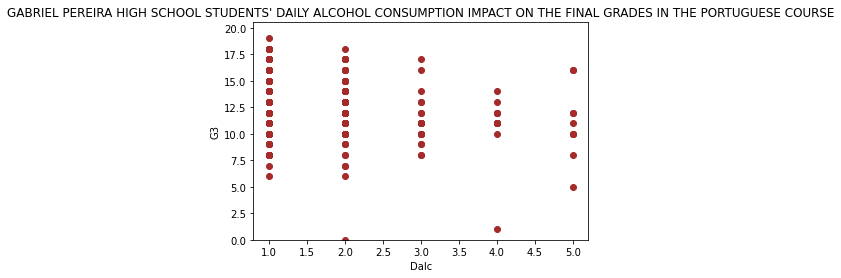

In [671]:
#creating scatter plot diagram for Gabriel Pereira high school students' daily alcohol consumption 'Dalc' in the Portuguese dataset
plt.scatter(alcohol_port_gp['Dalc'], alcohol_port_gp['G3'], c='brown')
plt.title("GABRIEL PEREIRA HIGH SCHOOL STUDENTS' DAILY ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN THE PORTUGUESE COURSE")
plt.ylim(0.0 ,20.5)
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.show()

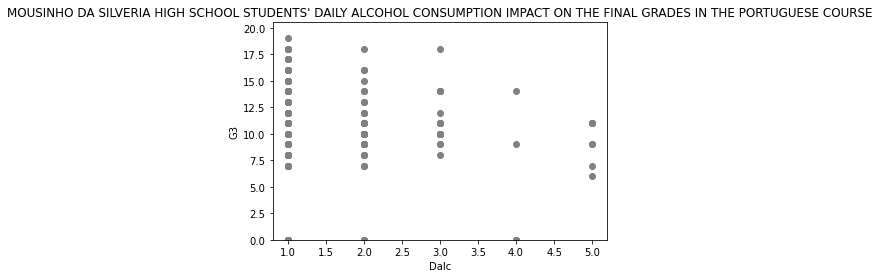

In [672]:
#creating scatter plot diagram for Mousinho da Silveira high school students' daily alcohol consumption 'Dalc' in the Portuguese dataset
plt.scatter(alcohol_port_ms['Dalc'], alcohol_port_ms['G3'], c='grey')
plt.title("MOUSINHO DA SILVERIA HIGH SCHOOL STUDENTS' DAILY ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN THE PORTUGUESE COURSE")
plt.ylim(0.0 ,20.5)
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.show()

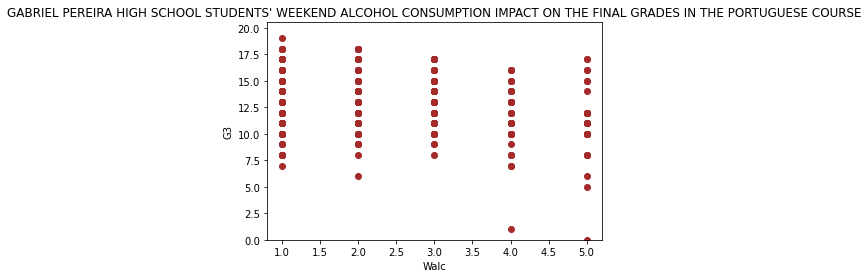

In [673]:
#creating scatter plot diagram for Gabriel Pereira high school students' weekend alcohol consumption 'Walc' in the Portuguese dataset
plt.scatter(alcohol_port_gp['Walc'], alcohol_port_gp['G3'], c='brown')
plt.title("GABRIEL PEREIRA HIGH SCHOOL STUDENTS' WEEKEND ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN THE PORTUGUESE COURSE")
plt.ylim(0.0 ,20.5)
plt.xlabel('Walc')
plt.ylabel('G3')
plt.show()

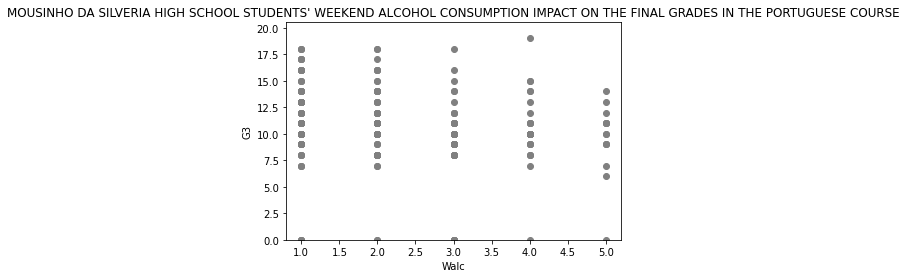

In [674]:
#creating scatter plot diagram for Mousinho da Silveira high school students' weekend alcohol consumption 'Walc' in the Portuguese dataset
plt.scatter(alcohol_port_ms['Walc'], alcohol_port_ms['G3'], c='grey')
plt.title("MOUSINHO DA SILVERIA HIGH SCHOOL STUDENTS' WEEKEND ALCOHOL CONSUMPTION IMPACT ON THE FINAL GRADES IN THE PORTUGUESE COURSE")
plt.ylim(0.0 ,20.5)
plt.xlabel('Walc')
plt.ylabel('G3')
plt.show()

## Portuguese high school students' alcohol consumption impact on their academic performance based on the students' sex:

### 1. Math dataset:

In [675]:
#creating seperate dataset from math datatset for male's sex
alcohol_math_males = alcohol_math_copy[alcohol_math_copy['sex'] == 'M']

#creating new column with for studentID in alcohol_math_males
seventh_studentID_list= list(range(1, 188, 1))
seventh_studentID_list_df= pd.DataFrame(seventh_studentID_list)
alcohol_math_males.insert(0, "studentID", seventh_studentID_list_df, True)

alcohol_math_males.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 5 to 394
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   studentID         187 non-null    int64 
 1   school            187 non-null    object
 2   sex               187 non-null    object
 3   age               187 non-null    int64 
 4   address           187 non-null    object
 5   famsize           187 non-null    object
 6   Pstatus           187 non-null    object
 7   Medu              187 non-null    int64 
 8   Fedu              187 non-null    int64 
 9   Mjob              187 non-null    object
 10  Fjob              187 non-null    object
 11  reason            187 non-null    object
 12  guardian          187 non-null    object
 13  traveltime        187 non-null    int64 
 14  studytime         187 non-null    int64 
 15  failures          187 non-null    int64 
 16  schoolsup         187 non-null    object
 17  famsup          

In [676]:
alcohol_math_males

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
5,1,GP,M,16,U,LE3,T,4,3,services,...,4,2,1,2,5,10,15,15,15,passed
6,2,GP,M,16,U,LE3,T,2,2,other,...,4,4,1,1,3,0,12,12,11,passed
8,3,GP,M,15,U,LE3,A,3,2,services,...,2,2,1,1,1,0,16,18,19,passed
9,4,GP,M,15,U,GT3,T,3,4,other,...,5,1,1,1,5,0,14,15,15,passed
12,5,GP,M,15,U,LE3,T,4,4,health,...,3,3,1,3,5,2,14,14,14,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,183,MS,M,20,U,LE3,A,2,2,services,...,5,4,4,5,4,11,9,9,9,failed
391,184,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,3,14,16,16,passed
392,185,MS,M,21,R,GT3,T,1,1,other,...,5,3,3,3,3,3,10,8,7,failed
393,186,MS,M,18,R,LE3,T,3,2,services,...,4,1,3,4,5,0,11,12,10,passed


In [677]:
alcohol_math_males.shape

(187, 35)

In [678]:
#creating seperate dataset from math datatset for female's sex
alcohol_math_females = alcohol_math_copy[alcohol_math_copy['sex'] == 'F']

#creating new column with for studentID in alcohol_math_males
seventh_studentID_list= list(range(1, 209, 1))
seventh_studentID_list_df= pd.DataFrame(seventh_studentID_list)
alcohol_math_females.insert(0, "studentID", seventh_studentID_list_df, True)

alcohol_math_females.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 389
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   studentID         208 non-null    int64 
 1   school            208 non-null    object
 2   sex               208 non-null    object
 3   age               208 non-null    int64 
 4   address           208 non-null    object
 5   famsize           208 non-null    object
 6   Pstatus           208 non-null    object
 7   Medu              208 non-null    int64 
 8   Fedu              208 non-null    int64 
 9   Mjob              208 non-null    object
 10  Fjob              208 non-null    object
 11  reason            208 non-null    object
 12  guardian          208 non-null    object
 13  traveltime        208 non-null    int64 
 14  studytime         208 non-null    int64 
 15  failures          208 non-null    int64 
 16  schoolsup         208 non-null    object
 17  famsup          

In [679]:
alcohol_math_females

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,failed
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,failed
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,passed
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,passed
4,5,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,204,MS,F,18,R,GT3,T,2,2,at_home,...,3,3,1,3,4,2,10,9,10,passed
386,205,MS,F,18,R,GT3,T,4,4,teacher,...,4,3,2,2,5,7,6,5,6,failed
387,206,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,0,7,5,0,failed
388,207,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,0,7,9,8,failed


In [680]:
alcohol_math_females.shape

(208, 35)

In [681]:
#creating seperate dataset of random (n = 187, where n: noumber of students) Gabriel Pereira high school female students 
alcohol_math_females_rand = alcohol_math_females.sample(n = 187)
del alcohol_math_females_rand['studentID']
eighth_studentID_list= list(range(1, 188, 1))
eighth_studentID_list_df= pd.DataFrame(eighth_studentID_list)
alcohol_math_females_rand.insert(0, "studentID", eighth_studentID_list_df, True)

In [682]:
alcohol_math_females_rand

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
335,1,GP,F,17,U,GT3,T,3,4,services,...,4,5,1,3,5,16,16,15,15,passed
212,2,GP,F,16,U,GT3,A,2,2,other,...,3,4,1,1,4,0,12,13,14,passed
105,3,GP,F,15,U,GT3,A,3,3,other,...,3,3,1,1,4,10,10,11,11,passed
67,4,GP,F,16,U,GT3,T,3,1,services,...,3,3,1,2,5,4,7,7,6,failed
111,5,GP,F,16,R,GT3,T,3,3,services,...,1,2,1,1,2,0,7,10,10,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,183,GP,F,17,U,GT3,T,1,1,other,...,4,4,1,3,1,4,9,9,10,passed
229,184,GP,F,17,U,GT3,A,2,1,other,...,2,3,1,2,3,10,12,10,12,passed
91,185,GP,F,15,U,GT3,T,4,3,services,...,5,5,1,3,1,4,16,17,18,passed
226,186,GP,F,17,U,GT3,T,3,2,other,...,3,4,1,3,3,10,16,15,15,passed


In [683]:
alcohol_math_females_rand.shape

(187, 35)

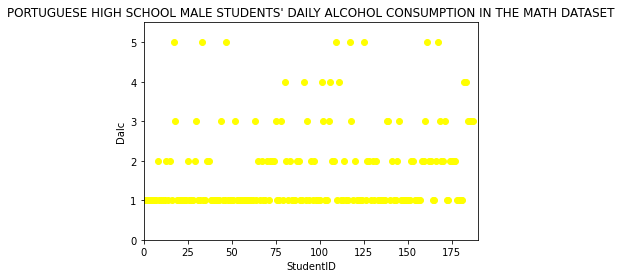

In [684]:
#creating scatter plot diagram for Gabriel Pereira high school male students' daily alcohol consumption 'Dalc' in the math dataset
plt.scatter(alcohol_math_males['studentID'], alcohol_math_males['Dalc'], c='yellow')
plt.title("PORTUGUESE HIGH SCHOOL MALE STUDENTS' DAILY ALCOHOL CONSUMPTION IN THE MATH DATASET")
plt.xlim(0.0 ,190)
plt.ylim(0.0 ,5.5)
plt.xlabel('StudentID')
plt.ylabel('Dalc')
plt.show()

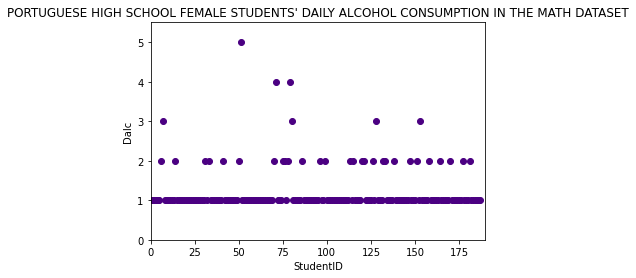

In [685]:
#creating scatter plot diagram for Gabriel Pereira high school female students' daily alcohol consumption 'Dalc' in the math dataset
plt.scatter(alcohol_math_females_rand['studentID'], alcohol_math_females_rand['Dalc'], c='indigo')
plt.title("PORTUGUESE HIGH SCHOOL FEMALE STUDENTS' DAILY ALCOHOL CONSUMPTION IN THE MATH DATASET")
plt.xlim(0.0 ,190)
plt.ylim(0.0 ,5.5)
plt.xlabel('StudentID')
plt.ylabel('Dalc')
plt.show()

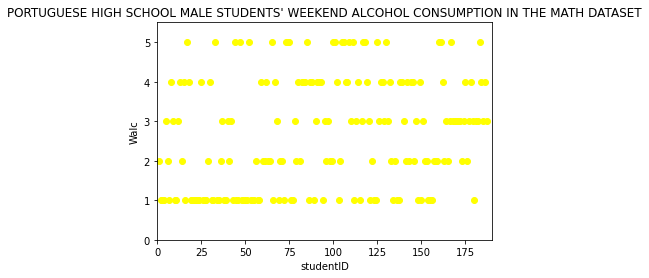

In [686]:
#creating scatter plot diagram for Gabriel Pereira high school male students' weekend alcohol consumption 'Walc' in the math dataset
plt.scatter(alcohol_math_males['studentID'], alcohol_math_males['Walc'], c='yellow')
plt.title("PORTUGUESE HIGH SCHOOL MALE STUDENTS' WEEKEND ALCOHOL CONSUMPTION IN THE MATH DATASET")
plt.xlim(0.0 ,190)
plt.ylim(0.0 ,5.5)
plt.xlabel('studentID')
plt.ylabel('Walc')
plt.show()

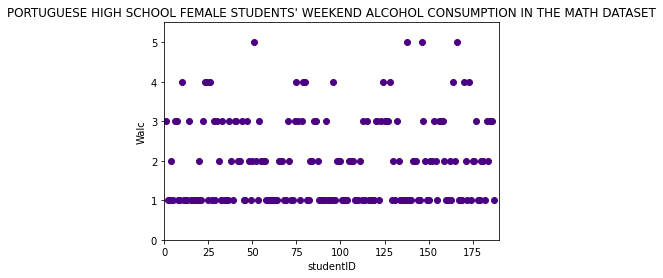

In [687]:
#creating scatter plot diagram for Gabriel Pereira high school female students' weekend alcohol consumption 'Walc' in the math dataset
plt.scatter(alcohol_math_females_rand['studentID'], alcohol_math_females_rand['Walc'], c='indigo')
plt.title("PORTUGUESE HIGH SCHOOL FEMALE STUDENTS' WEEKEND ALCOHOL CONSUMPTION IN THE MATH DATASET")
plt.xlim(0.0 ,190)
plt.ylim(0.0 ,5.5)
plt.xlabel('studentID')
plt.ylabel('Walc')
plt.show()

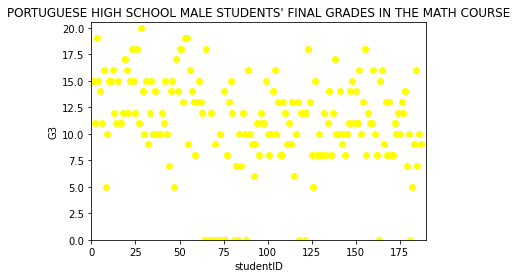

In [688]:
#creating scatter plot diagram for Gabriel Pereira high school male students' final grades
plt.scatter(alcohol_math_males['studentID'], alcohol_math_males['G3'], c='yellow')
plt.title("PORTUGUESE HIGH SCHOOL MALE STUDENTS' FINAL GRADES IN THE MATH COURSE")
plt.xlim(0.0 ,190)
plt.ylim(0.0 ,20.5)
plt.xlabel('studentID')
plt.ylabel('G3')
plt.show()

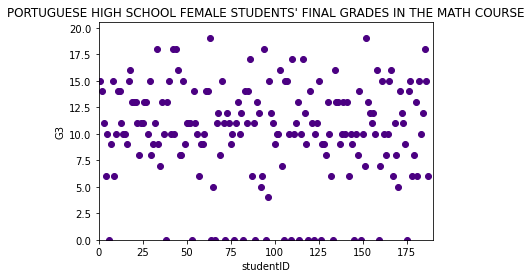

In [689]:
#creating scatter plot diagram for Gabriel Pereira high school female students' final grades
plt.scatter(alcohol_math_females_rand['studentID'], alcohol_math_females_rand['G3'], c='indigo')
plt.title("PORTUGUESE HIGH SCHOOL FEMALE STUDENTS' FINAL GRADES IN THE MATH COURSE")
plt.xlim(0.0 ,190)
plt.ylim(0.0 ,20.5)
plt.xlabel('studentID')
plt.ylabel('G3')
plt.show()

### 2. Portuguese dataset:

In [690]:
#creating seperate dataset from math datatset for male's sex
alcohol_port_males = alcohol_port_copy[alcohol_port_copy['sex'] == 'M']

#creating new column with for studentID in alcohol_math_males
ninth_studentID_list= list(range(1, 267, 1))
ninth_studentID_list_df= pd.DataFrame(ninth_studentID_list)
alcohol_port_males.insert(0, "studentID", ninth_studentID_list_df, True)

alcohol_port_males.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 5 to 648
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   studentID         266 non-null    int64 
 1   school            266 non-null    object
 2   sex               266 non-null    object
 3   age               266 non-null    int64 
 4   address           266 non-null    object
 5   famsize           266 non-null    object
 6   Pstatus           266 non-null    object
 7   Medu              266 non-null    int64 
 8   Fedu              266 non-null    int64 
 9   Mjob              266 non-null    object
 10  Fjob              266 non-null    object
 11  reason            266 non-null    object
 12  guardian          266 non-null    object
 13  traveltime        266 non-null    int64 
 14  studytime         266 non-null    int64 
 15  failures          266 non-null    int64 
 16  schoolsup         266 non-null    object
 17  famsup          

In [691]:
alcohol_port_males

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
5,1,GP,M,16,U,LE3,T,4,3,services,...,4,2,1,2,5,6,12,12,13,passed
6,2,GP,M,16,U,LE3,T,2,2,other,...,4,4,1,1,3,0,13,12,13,passed
8,3,GP,M,15,U,LE3,A,3,2,services,...,2,2,1,1,1,0,15,16,17,passed
9,4,GP,M,15,U,GT3,T,3,4,other,...,5,1,1,1,5,0,12,12,13,passed
12,5,GP,M,15,U,LE3,T,4,4,health,...,3,3,1,3,5,0,12,13,12,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,262,MS,M,17,U,GT3,T,2,3,other,...,4,3,1,1,3,4,14,15,16,passed
639,263,MS,M,19,R,GT3,T,1,1,other,...,3,2,1,3,5,0,5,8,0,failed
640,264,MS,M,18,R,GT3,T,4,2,other,...,4,3,4,3,3,0,7,7,0,failed
647,265,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,10,10,10,passed


In [692]:
alcohol_port_males.shape

(266, 35)

In [693]:
#creating seperate dataset from math datatset for female's sex
alcohol_port_females = alcohol_port_copy[alcohol_port_copy['sex'] == 'F']

#creating new column with for studentID in alcohol_math_males
tenth_studentID_list= list(range(1, 384, 1))
tenth_studentID_list_df= pd.DataFrame(tenth_studentID_list)
alcohol_port_females.insert(0, "studentID", tenth_studentID_list_df, True)

alcohol_port_females.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 646
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   studentID         383 non-null    int64 
 1   school            383 non-null    object
 2   sex               383 non-null    object
 3   age               383 non-null    int64 
 4   address           383 non-null    object
 5   famsize           383 non-null    object
 6   Pstatus           383 non-null    object
 7   Medu              383 non-null    int64 
 8   Fedu              383 non-null    int64 
 9   Mjob              383 non-null    object
 10  Fjob              383 non-null    object
 11  reason            383 non-null    object
 12  guardian          383 non-null    object
 13  traveltime        383 non-null    int64 
 14  studytime         383 non-null    int64 
 15  failures          383 non-null    int64 
 16  schoolsup         383 non-null    object
 17  famsup          

In [694]:
alcohol_port_females

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,4,0,11,11,passed
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,2,9,11,11,passed
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,6,12,13,12,passed
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,0,14,14,14,passed
4,5,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,0,11,13,13,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,379,MS,F,17,U,GT3,T,4,3,teacher,...,5,4,1,1,1,0,6,9,11,passed
643,380,MS,F,18,R,GT3,T,4,4,teacher,...,4,3,2,2,5,4,7,9,10,passed
644,381,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,10,11,10,passed
645,382,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,15,15,16,passed


In [695]:
alcohol_port_females.shape

(383, 35)

In [696]:
#creating seperate dataset of random (n = 266, where n: noumber of students) Gabriel Pereira high school female students 
alcohol_port_females_rand = alcohol_port_females.sample(n = 266)
del alcohol_port_females_rand['studentID']
eleventh_studentID_list= list(range(1, 267, 1))
eleventh_studentID_list_df= pd.DataFrame(eleventh_studentID_list)
alcohol_port_females_rand.insert(0, "studentID", eleventh_studentID_list_df, True)

In [697]:
alcohol_port_females_rand

,studentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
63,1,GP,F,16,U,GT3,T,4,3,teacher,...,4,4,2,4,4,0,14,13,13,passed
347,2,GP,F,17,R,GT3,T,4,4,services,...,3,4,1,1,5,0,7,7,8,failed
55,3,GP,F,16,U,GT3,A,2,1,other,...,3,4,1,1,2,2,12,13,12,passed
131,4,GP,F,18,U,GT3,T,2,1,services,...,4,5,1,3,5,10,10,9,8,failed
620,5,MS,F,17,U,LE3,T,4,4,at_home,...,3,4,1,1,1,4,15,14,15,passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,262,GP,F,17,R,GT3,T,2,1,at_home,...,1,1,1,1,3,2,13,13,13,passed
230,263,GP,F,17,U,GT3,T,4,3,other,...,4,5,2,4,1,16,11,9,10,passed
4,264,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,0,11,13,13,passed
275,265,GP,F,18,U,GT3,T,2,1,other,...,4,4,1,1,3,10,12,10,11,passed


In [698]:
alcohol_port_females_rand.shape

(266, 35)

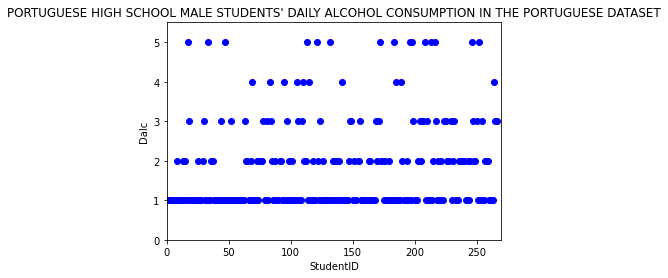

In [699]:
#creating scatter plot diagram for Gabriel Pereira high school male students' daily alcohol consumption 'Dalc' in the Portuguese dataset
plt.scatter(alcohol_port_males['studentID'], alcohol_port_males['Dalc'], c='blue')
plt.title("PORTUGUESE HIGH SCHOOL MALE STUDENTS' DAILY ALCOHOL CONSUMPTION IN THE PORTUGUESE DATASET")
plt.xlim(0.0 ,270)
plt.ylim(0.0 ,5.5)
plt.xlabel('StudentID')
plt.ylabel('Dalc')
plt.show()

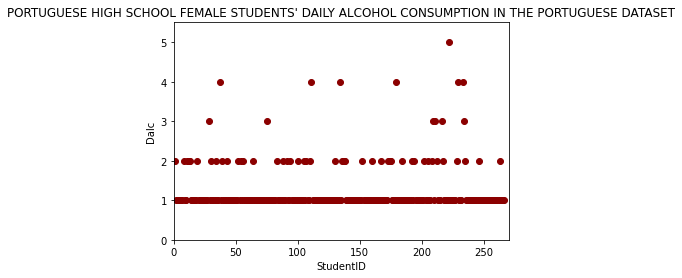

In [700]:
#creating scatter plot diagram for high school female students' daily alcohol consumption 'Dalc' in the portuguese dataset
plt.scatter(alcohol_port_females_rand['studentID'], alcohol_port_females_rand['Dalc'], c='darkred')
plt.title("PORTUGUESE HIGH SCHOOL FEMALE STUDENTS' DAILY ALCOHOL CONSUMPTION IN THE PORTUGUESE DATASET")
plt.xlim(0.0 ,270)
plt.ylim(0.0 ,5.5)
plt.xlabel('StudentID')
plt.ylabel('Dalc')
plt.show()

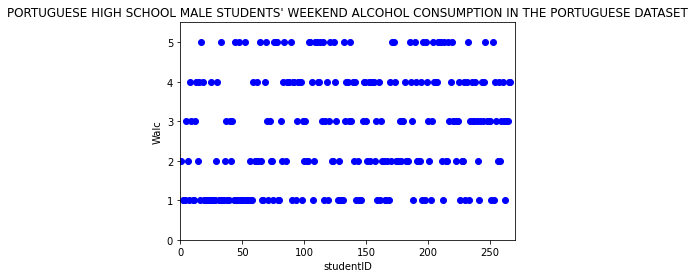

In [701]:
#creating scatter plot diagram for Portuguese high school male students' weekend alcohol consumption 'Walc' in the Portuguese dataset
plt.scatter(alcohol_port_males['studentID'], alcohol_port_males['Walc'], c='blue')
plt.title("PORTUGUESE HIGH SCHOOL MALE STUDENTS' WEEKEND ALCOHOL CONSUMPTION IN THE PORTUGUESE DATASET")
plt.xlim(0.0 ,270)
plt.ylim(0.0 ,5.5)
plt.xlabel('studentID')
plt.ylabel('Walc')
plt.show()

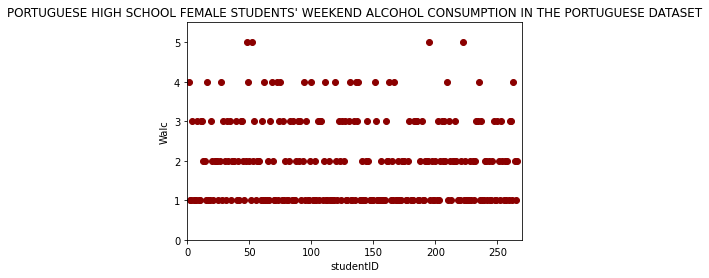

In [702]:
#creating scatter plot diagram for Gabriel Pereira high school female students' weekend alcohol consumption 'Walc' in the Portuguese dataset
plt.scatter(alcohol_port_females_rand['studentID'], alcohol_port_females_rand['Walc'], c='darkred')
plt.title("PORTUGUESE HIGH SCHOOL FEMALE STUDENTS' WEEKEND ALCOHOL CONSUMPTION IN THE PORTUGUESE DATASET")
plt.xlim(0.0 ,270)
plt.ylim(0.0 ,5.5)
plt.xlabel('studentID')
plt.ylabel('Walc')
plt.show()

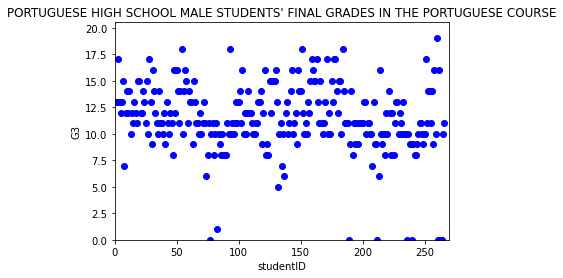

In [703]:
#creating scatter plot diagram for high school male students' final grades
plt.scatter(alcohol_port_males['studentID'], alcohol_port_males['G3'], c='blue')
plt.title("PORTUGUESE HIGH SCHOOL MALE STUDENTS' FINAL GRADES IN THE PORTUGUESE COURSE")
plt.xlim(0.0 ,270)
plt.ylim(0.0 ,20.5)
plt.xlabel('studentID')
plt.ylabel('G3')
plt.show()

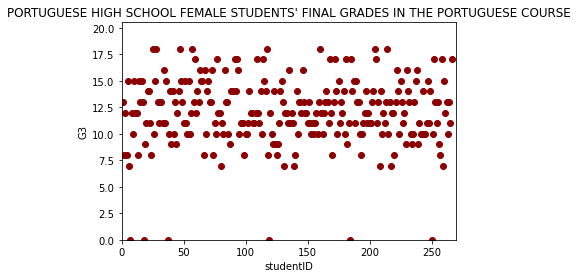

In [704]:
#creating scatter plot diagram for Gabriel Pereira high school female students' final grades
plt.scatter(alcohol_port_females_rand['studentID'], alcohol_port_females_rand['G3'], c='darkred')
plt.title("PORTUGUESE HIGH SCHOOL FEMALE STUDENTS' FINAL GRADES IN THE PORTUGUESE COURSE")
plt.xlim(0.0 ,270)
plt.ylim(0.0 ,20.5)
plt.xlabel('studentID')
plt.ylabel('G3')
plt.show()

## Constructing ML regression model to predict final grade 'G3' value based on the dataset attributes:

## 1.Math dataset:

In [705]:
#converting categorical features to numerical features in order to represent more attributes to the MLregression model which improves the model's efficiency
LabelEnc = LabelEncoder()
math_categorical_features = alcohol_math_copy.select_dtypes(include = ['object']).columns
for categorical_features in math_categorical_features:
    alcohol_math_copy[categorical_features] = LabelEnc.fit_transform(alcohol_math_copy[categorical_features])
    
alcohol_math_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,4,4,5,4,11,9,9,9,0
391,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,3,14,16,16,1
392,1,1,21,0,0,1,1,1,2,2,...,5,3,3,3,3,3,10,8,7,0
393,1,1,18,0,1,1,3,2,3,2,...,4,1,3,4,5,0,11,12,10,1


In [706]:
#creating dataframe for the features of our ML regression model
regression_features = alcohol_math_copy.copy()
x = regression_features
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,4,4,5,4,11,9,9,9,0
391,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,3,14,16,16,1
392,1,1,21,0,0,1,1,1,2,2,...,5,3,3,3,3,3,10,8,7,0
393,1,1,18,0,1,1,3,2,3,2,...,4,1,3,4,5,0,11,12,10,1


In [707]:
x.iloc[2]

school               0
sex                  0
age                 15
address              1
famsize              1
Pstatus              1
Medu                 1
Fedu                 1
Mjob                 0
Fjob                 2
reason               2
guardian             1
traveltime           1
studytime            2
failures             3
schoolsup            1
famsup               0
paid                 1
activities           0
nursery              1
higher               1
internet             1
romantic             0
famrel               4
freetime             3
goout                2
Dalc                 2
Walc                 3
health               3
absences            10
G1                   7
G2                   8
G3                  10
passed_or_failed     1
Name: 2, dtype: int64

In [708]:
#creating dataframe for the result of our ML regression model
regression_target = alcohol_math_copy[['G3']].copy()
y = regression_target
y

,G3
0,6
1,6
2,10
3,15
4,10
...,...
390,9
391,16
392,7
393,10


In [709]:
y.iloc[2]

G3    10
Name: 2, dtype: int64

In [710]:
#splitting the math dataset into a training dataset and a testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

#scaling the values in x
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

### 1.a. Perform prediction using linear Regression model:

In [711]:
#fitting the model to the training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [712]:
#performing prediction using linear regression model
y_prediction = regressor.predict(x_test)
y_prediction

array([[ 1.80000000e+01],
       [ 1.60000000e+01],
       [ 1.10000000e+01],
       [ 1.40000000e+01],
       [ 1.00000000e+01],
       [ 1.00000000e+01],
       [ 1.90000000e+01],
       [ 7.00000000e+00],
       [ 1.50000000e+01],
       [ 1.50000000e+01],
       [ 1.30000000e+01],
       [-7.10542736e-15],
       [ 1.50000000e+01],
       [ 1.80000000e+01],
       [-1.24344979e-14],
       [ 1.20000000e+01],
       [ 1.10000000e+01],
       [ 8.00000000e+00],
       [ 1.30000000e+01],
       [ 1.00000000e+01],
       [ 1.60000000e+01],
       [ 1.00000000e+01],
       [ 5.32907052e-15],
       [ 1.80000000e+01],
       [ 1.10000000e+01],
       [ 8.00000000e+00],
       [ 4.00000000e+00],
       [ 9.00000000e+00],
       [ 1.50000000e+01],
       [ 1.60000000e+01],
       [ 7.00000000e+00],
       [-1.77635684e-15],
       [ 1.10000000e+01],
       [ 1.00000000e+01],
       [ 1.20000000e+01],
       [ 1.60000000e+01],
       [ 1.00000000e+01],
       [ 1.00000000e+01],
       [ 1.1

In [713]:
#fitting a model to the tranining set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [714]:
#preform prediction using linear regression model
y_prediction = regressor.predict(x_test)
y_prediction

array([[ 1.80000000e+01],
       [ 1.60000000e+01],
       [ 1.10000000e+01],
       [ 1.40000000e+01],
       [ 1.00000000e+01],
       [ 1.00000000e+01],
       [ 1.90000000e+01],
       [ 7.00000000e+00],
       [ 1.50000000e+01],
       [ 1.50000000e+01],
       [ 1.30000000e+01],
       [-7.10542736e-15],
       [ 1.50000000e+01],
       [ 1.80000000e+01],
       [-1.24344979e-14],
       [ 1.20000000e+01],
       [ 1.10000000e+01],
       [ 8.00000000e+00],
       [ 1.30000000e+01],
       [ 1.00000000e+01],
       [ 1.60000000e+01],
       [ 1.00000000e+01],
       [ 5.32907052e-15],
       [ 1.80000000e+01],
       [ 1.10000000e+01],
       [ 8.00000000e+00],
       [ 4.00000000e+00],
       [ 9.00000000e+00],
       [ 1.50000000e+01],
       [ 1.60000000e+01],
       [ 7.00000000e+00],
       [-1.77635684e-15],
       [ 1.10000000e+01],
       [ 1.00000000e+01],
       [ 1.20000000e+01],
       [ 1.60000000e+01],
       [ 1.00000000e+01],
       [ 1.00000000e+01],
       [ 1.1

In [715]:
#descriptive statistical information for the expected target value
y_test.describe()

,G3
count,131.000000
mean,11.297710
std,4.016686
min,0.000000
25%,10.000000
50%,11.000000
75%,14.000000
max,20.000000


In [716]:
# evaluating linear regression accuracy using root mean square error approach
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [717]:
print(RMSE)

1.0394703298285816e-14


In [718]:
#1.0394703298285816e-14 = 0.000000000000010394703298285816

### 1.b. Perform prediction using decision tree regressor:

In [719]:
#fitting a new regression model to the training set
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [720]:
#perform prediction using decision tree regressor
y_prediction = regressor.predict(x_test)
y_prediction

array([18., 16., 11., 14., 10., 10., 19.,  7., 15., 15., 13.,  0., 15.,
       18.,  0., 12., 11.,  8., 13., 10., 16., 10.,  0., 18., 11.,  8.,
        5.,  9., 15., 16.,  7.,  0., 11., 10., 12., 16., 10., 10., 11.,
       10., 10., 10., 13., 19., 11., 15., 15.,  8., 10.,  8., 16., 11.,
       11., 10., 15., 10.,  9., 10., 17.,  9.,  0., 14.,  8., 13., 16.,
       12., 14., 10., 15., 14., 17., 12., 14., 15., 16., 12.,  9., 11.,
       12., 11., 18.,  9., 12.,  9., 14., 14., 15.,  9.,  9., 10.,  7.,
        8.,  8., 10., 10., 11., 10., 15.,  0., 10., 12.,  8., 11.,  6.,
        8., 15., 10., 10., 18.,  5.,  8., 11., 14., 11., 13., 19., 12.,
       12.,  9., 10., 14., 14.,  6., 11., 12., 10., 14., 11., 16., 10.,
       10.])

In [721]:
#descriptive statistical information for the expected target value
y_test.describe()

,G3
count,131.000000
mean,11.297710
std,4.016686
min,0.000000
25%,10.000000
50%,11.000000
75%,14.000000
max,20.000000


In [722]:
# evaluating linear regression accuracy using root mean square error approach
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [723]:
print(RMSE)

0.1235604126430431


## 2. Portuguese dataset:

In [724]:
#converting categorical features to numerical features in order to represent more attributes to the MLregression model which improves the model's efficiency
LabelEnc = LabelEncoder()
port_categorical_features = alcohol_port_copy.select_dtypes(include = ['object']).columns
for categorical_features in port_categorical_features:
    alcohol_port_copy[categorical_features] = LabelEnc.fit_transform(alcohol_port_copy[categorical_features])
    
alcohol_port_copy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,1
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,1
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,4,2,1,2,5,4,10,11,10,1
645,1,0,18,1,1,1,3,1,4,3,...,3,4,1,1,1,4,15,15,16,1
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,5,6,11,12,9,0
647,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,6,10,10,10,1


In [729]:
#creating dataframe for the features of our ML regression model
regression_features = alcohol_port_copy.copy()
x = regression_features
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed_or_failed
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,1
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,1
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,4,2,1,2,5,4,10,11,10,1
645,1,0,18,1,1,1,3,1,4,3,...,3,4,1,1,1,4,15,15,16,1
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,5,6,11,12,9,0
647,1,1,17,1,1,1,3,1,3,3,...,4,5,3,4,2,6,10,10,10,1


In [730]:
x.iloc[2]

school               0
sex                  0
age                 15
address              1
famsize              1
Pstatus              1
Medu                 1
Fedu                 1
Mjob                 0
Fjob                 2
reason               2
guardian             1
traveltime           1
studytime            2
failures             0
schoolsup            1
famsup               0
paid                 0
activities           0
nursery              1
higher               1
internet             1
romantic             0
famrel               4
freetime             3
goout                2
Dalc                 2
Walc                 3
health               3
absences             6
G1                  12
G2                  13
G3                  12
passed_or_failed     1
Name: 2, dtype: int64

In [731]:
#creating dataframe for the result of our ML regression model
regression_target = alcohol_port_copy[['G3']].copy()
y = regression_target
y

,G3
0,11
1,11
2,12
3,14
4,13
...,...
644,10
645,16
646,9
647,10


In [732]:
y.iloc[2]

G3    12
Name: 2, dtype: int64

In [733]:
#splitting the math dataset into a training dataset and a testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

#scaling the values in x
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

### 2.a. Perform prediction using linear Regression model:

In [734]:
#fitting the model to the training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [735]:
#performing prediction using linear regression model
y_prediction = regressor.predict(x_test)
y_prediction

array([[ 1.40000000e+01],
       [ 1.10000000e+01],
       [ 1.10000000e+01],
       [ 1.00000000e+01],
       [ 1.20000000e+01],
       [ 1.30000000e+01],
       [ 1.30000000e+01],
       [-8.88178420e-15],
       [ 1.20000000e+01],
       [ 1.50000000e+01],
       [ 1.10000000e+01],
       [ 1.30000000e+01],
       [ 1.30000000e+01],
       [ 1.40000000e+01],
       [ 1.40000000e+01],
       [ 9.00000000e+00],
       [ 1.60000000e+01],
       [ 1.00000000e+01],
       [ 1.80000000e+01],
       [ 1.10000000e+01],
       [ 1.20000000e+01],
       [ 8.00000000e+00],
       [ 1.30000000e+01],
       [ 1.20000000e+01],
       [ 1.60000000e+01],
       [ 1.00000000e+01],
       [ 1.40000000e+01],
       [ 1.30000000e+01],
       [ 1.10000000e+01],
       [ 1.80000000e+01],
       [ 1.30000000e+01],
       [ 1.00000000e+01],
       [ 5.00000000e+00],
       [ 1.00000000e+01],
       [ 1.30000000e+01],
       [ 1.00000000e+01],
       [ 1.40000000e+01],
       [ 1.20000000e+01],
       [ 1.1

In [736]:
#fitting a model to the tranining set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [737]:
#preform prediction using linear regression model
y_prediction = regressor.predict(x_test)
y_prediction

array([[ 1.40000000e+01],
       [ 1.10000000e+01],
       [ 1.10000000e+01],
       [ 1.00000000e+01],
       [ 1.20000000e+01],
       [ 1.30000000e+01],
       [ 1.30000000e+01],
       [-8.88178420e-15],
       [ 1.20000000e+01],
       [ 1.50000000e+01],
       [ 1.10000000e+01],
       [ 1.30000000e+01],
       [ 1.30000000e+01],
       [ 1.40000000e+01],
       [ 1.40000000e+01],
       [ 9.00000000e+00],
       [ 1.60000000e+01],
       [ 1.00000000e+01],
       [ 1.80000000e+01],
       [ 1.10000000e+01],
       [ 1.20000000e+01],
       [ 8.00000000e+00],
       [ 1.30000000e+01],
       [ 1.20000000e+01],
       [ 1.60000000e+01],
       [ 1.00000000e+01],
       [ 1.40000000e+01],
       [ 1.30000000e+01],
       [ 1.10000000e+01],
       [ 1.80000000e+01],
       [ 1.30000000e+01],
       [ 1.00000000e+01],
       [ 5.00000000e+00],
       [ 1.00000000e+01],
       [ 1.30000000e+01],
       [ 1.00000000e+01],
       [ 1.40000000e+01],
       [ 1.20000000e+01],
       [ 1.1

In [738]:
#descriptive statistical information for the expected target value
y_test.describe()

,G3
count,215.000000
mean,11.981395
std,3.423343
min,0.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,19.000000


In [739]:
# evaluating linear regression accuracy using root mean square error approach
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [740]:
print(RMSE)

6.344597772058368e-15


In [741]:
#6.344597772058368e-15 = 0.000000000000006344597772058368

### 2.b. Perform prediction using decision tree regressor:

In [742]:
#fitting a new regression model to the training set
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [743]:
#perform prediction using decision tree regressor
y_prediction = regressor.predict(x_test)
y_prediction

array([14., 11., 11., 10., 12., 13., 13.,  0., 12., 15., 11., 13., 13.,
       14., 14.,  9., 16., 10., 18., 11., 12.,  8., 13., 12., 16., 10.,
       14., 13., 11., 18., 13., 10.,  6., 10., 13., 10., 14., 12., 11.,
       14., 11., 18.,  8., 14., 15., 11., 10.,  8., 12., 15., 10., 10.,
       10., 17., 16.,  9.,  9., 13.,  0., 11., 13., 16., 10., 16., 11.,
        9.,  8., 11.,  8., 11.,  9., 11., 16., 12., 11., 13., 11., 14.,
        8.,  8.,  0., 10., 11., 14., 17., 13., 11., 10., 17., 13., 13.,
       10.,  9., 17., 16., 15., 14., 14.,  0., 17., 13., 10., 13., 15.,
       14., 11., 11., 11., 16., 11., 17., 10., 10.,  8., 13., 14.,  0.,
        8., 12., 18., 12.,  9., 16., 11., 10., 12.,  0., 14., 15.,  9.,
       10., 13., 10., 13., 13., 12., 14., 11.,  6., 17., 12., 10., 12.,
       13., 10., 10., 17., 11., 17., 14., 13., 15., 13.,  8., 12., 14.,
       11., 14., 11., 16., 14., 10., 13., 16., 13., 10., 11., 15., 15.,
       11., 10., 11., 12., 11., 10., 14., 15., 12., 16., 12.,  8

In [744]:
#descriptive statistical information for the expected target value
y_test.describe()

,G3
count,215.000000
mean,11.981395
std,3.423343
min,0.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,19.000000


In [745]:
# evaluating linear regression accuracy using root mean square error approach
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [746]:
print(RMSE)

0.1363988678940947
